In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Total Table.csv', delimiter =';')
df.rename(columns={'№':'Table Rank'}, inplace=True)

In [3]:
##Splitting off the +- value from the website. will engineer myself.

df['xG'] = df['xG'].str.split('[\+\-]', expand=True)[0]
df['xGA'] = df['xGA'].str.split('[\+\-]', expand=True)[0]
df['xPTS'] = df['xPTS'].str.split('[\+\-]', expand=True)[0]

##changing to int/float to do math
df[['G', 'GA', 'PTS']] = df[['G', 'GA', 'PTS']].astype(int)
df[['xG', 'xGA', 'xPTS']] = df[['xG', 'xGA', 'xPTS']].astype(float)

In [4]:
##New Column Creation
df['xG Diff'] = df['xG'] - df['G']
df['xGA Diff'] = df['xGA'] - df['GA']
df['xPTS Diff'] = df['xPTS'] - df['PTS']

df.to_excel('Updated All.xlsx')

In [5]:
##Showing only this year

this_year = df[df['Year'] == 2023]

this_year = this_year[['Team', 'xPTS', 'PTS', 'xPTS Diff']]

this_year = this_year.sort_values(by='xPTS', ascending=False)

this_year

,Team,xPTS,PTS,xPTS Diff
1,Bayern Munich,40.72,41,-0.28
2,VfB Stuttgart,36.95,34,2.95
0,Bayer Leverkusen,36.75,45,-8.25
3,RasenBallsport Leipzig,33.94,33,0.94
4,Borussia Dortmund,26.87,30,-3.13
6,Freiburg,24.01,25,-0.99
13,Bochum,22.81,17,5.81
15,Mainz 05,22.14,11,11.14
5,Eintracht Frankfurt,21.43,27,-5.57
9,Borussia M.Gladbach,20.53,20,0.53


For xG and xPTs lower is better (if a team has 35 points and their xPTS is 30 then diff -5)

For xGA higher is better (if a team has concedeed 24 goals and has an xGA of 30 then then diff = 6)\

Isolating 10 worst mid-season performances

In [6]:
##Bottom 10 of last decade

bottom_ten = df.sort_values(by='xPTS Diff', ascending=False).head(10)

bottom_ten.rename(columns={'Table Rank':'Mid-Season Table Rank'}, inplace=True)

##Entering where these teams ended up
bottom_ten['Final Table Rank'] = [17, 15, 9, 14, 18, 17, 17, 12, 0, 7]
bottom_ten['Final Table Rank'] = bottom_ten['Final Table Rank'].astype(int)

##Replacing 0 with null since 2023 season finishing is undetermined
bottom_ten['Final Table Rank'] = bottom_ten['Final Table Rank'].replace(0, 'TBD')

##Entering if these teams were relegated
bottom_ten['Relegated?'] = ['Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'TBD', 'No']

##Downsizing table for aesthetics
bottom_ten = bottom_ten[['Team', 'Year','xPTS Diff', 'Mid-Season Table Rank', 'Final Table Rank', 'Relegated?']] 

bottom_ten

,Team,Year,xPTS Diff,Mid-Season Table Rank,Final Table Rank,Relegated?
178,Borussia Dortmund,2014,11.52,17,17,Yes
15,Mainz 05,2023,11.14,16,15,No
70,Mainz 05,2020,10.78,17,9,No
158,VfB Stuttgart,2015,10.65,15,14,No
35,Schalke 04,2022,9.48,18,18,Yes
125,FC Cologne,2017,8.40,18,17,Yes
102,Schalke 04,2018,8.32,13,17,Yes
84,Eintracht Frankfurt,2019,8.30,13,12,No
104,Augsburg,2018,8.15,15,TBD,TBD
142,Ingolstadt,2016,7.79,17,7,No


Over-engineered Graphs

1. Scatter Plot of Mid Season Table Rank v. Final Table Rank

2. Scatter Plot of xGA performance by xG performance at the midway point

/var/folders/3_/s0jb41qj607g72j5zzcpvdgh0000gn/T/ipykernel_40550/628355912.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([lims[0], lims[1]], [lims[0], lims[1]], 'k-', alpha=0.5, zorder=0, color='white')


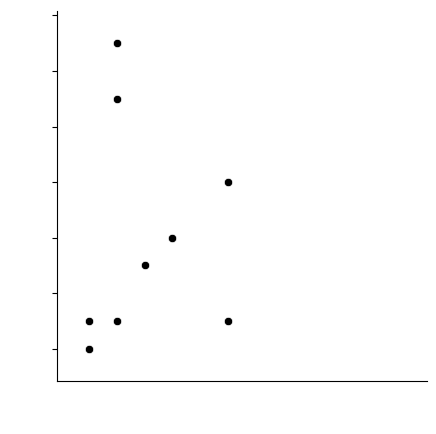

In [7]:
bottom_ten = bottom_ten[bottom_ten['Final Table Rank'] != 'TBD']

ax = sns.scatterplot(data=bottom_ten, x='Mid-Season Table Rank', y='Final Table Rank', 
                color = 'black', edgecolor='white',
                legend=False)

##Inverting axes so that better position is more right and upward
ax.invert_xaxis() 
ax.invert_yaxis()

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

plt.rcParams['figure.facecolor'] = '#999999'
plt.rcParams['axes.facecolor'] = '#999999'

# Add diagonal line 
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# Plot diagonal line from (lims[0], lims[0]) to (lims[1], lims[1])
ax.plot([lims[0], lims[1]], [lims[0], lims[1]], 'k-', alpha=0.5, zorder=0, color='white')

##Fixing up axes
plt.xlabel('Mid Season Table Position', color='white')
plt.ylabel('Final Table Position', color='white')
plt.tick_params(axis='x', colors='white') # x-axis ticks
plt.tick_params(axis='y', labelcolor='white') # y-axis labels

##Adding text
plt.text(0.75, 0.35, 'Finished worse than\nMid-Season Position', 
         ha='center', va='center', color='white', transform=plt.gca().transAxes,
         fontsize=8) 

plt.text(0.25, 0.65, 'Finished better than\nMid-Season Position',
         ha='center', va='center', color='white', transform=plt.gca().transAxes,
         fontsize=8)

ax.set_aspect('equal')
plt.show()

Text(0.25, 0.79, 'Better than expected Goals For\nand Goals Against')

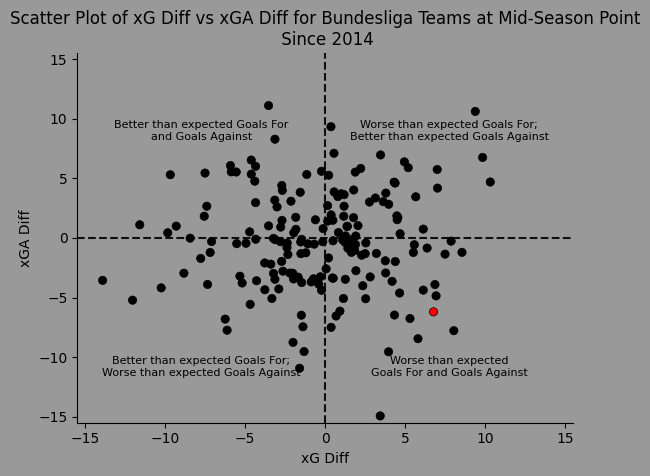

In [8]:
sns.scatterplot(data=df, x='xG Diff', y='xGA Diff', 
                hue=df.index==15, palette=['black', 'red'], edgecolor='black',
                legend=False)

plt.title('Scatter Plot of xG Diff vs xGA Diff for Bundesliga Teams at Mid-Season Point\n Since 2014', color='black')

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)

plt.rcParams['figure.facecolor'] = '#F5F5DC'
plt.rcParams['axes.facecolor'] = '#F5F5DC'

# Add vertical and horizontal lines  
plt.axvline(x=0, linestyle='--', color='black', alpha=0.9)
plt.axhline(y=0, linestyle='--', color='black', alpha=0.9)

# Changing label and tick colors
plt.xlabel('xG Diff', color='black')
plt.ylabel('xGA Diff', color='black')
plt.tick_params(axis='x', colors='black') # x-axis ticks
plt.tick_params(axis='y', labelcolor='black') # y-axis labels


# Set axis limits  
plt.xlim(-15.5, 15.5)
plt.ylim(-15.5, 15.5)

# Quadrant labels...

plt.text(0.75, 0.15, 'Worse than expected\nGoals For and Goals Against', 
         ha='center', va='center', color='black', transform=plt.gca().transAxes,
         fontsize=8) 

plt.text(0.25, 0.15, 'Better than expected Goals For;\nWorse than expected Goals Against',
         ha='center', va='center', color='black', transform=plt.gca().transAxes,
         fontsize=8)

plt.text(0.75, 0.79, 'Worse than expected Goals For;\nBetter than expected Goals Against',
         ha='center', va='center', color='black', transform=plt.gca().transAxes,
         fontsize=8)

plt.text(0.25, 0.79, 'Better than expected Goals For\nand Goals Against',
         ha='center', va='center', color='black', transform=plt.gca().transAxes, 
         fontsize=8)

Text(0.25, 0.9, 'Better than expected Goals For\nand Goals Against')

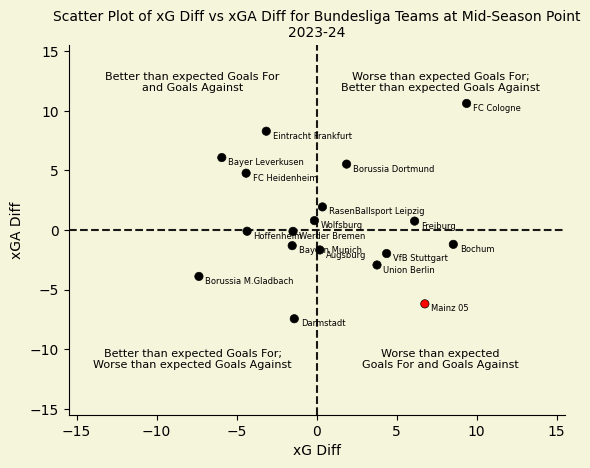

In [9]:
df = df[df['Year'] == 2023]

sns.scatterplot(data=df, x='xG Diff', y='xGA Diff', 
                hue=df.index==15, palette=['black', 'red'], edgecolor='black',
                legend=False)

plt.title('Scatter Plot of xG Diff vs xGA Diff for Bundesliga Teams at Mid-Season Point\n2023-24', color='black', fontsize=10)

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)

plt.rcParams['figure.facecolor'] = '#F5F5DC'
plt.rcParams['axes.facecolor'] = '#F5F5DC'

##Add vertical and horizontal lines  
plt.axvline(x=0, linestyle='--', color='black', alpha=0.9)
plt.axhline(y=0, linestyle='--', color='black', alpha=0.9)

##Changing label and tick colors
plt.xlabel('xG Diff', color='black')
plt.ylabel('xGA Diff', color='black')
plt.tick_params(axis='x', colors='black') # x-axis ticks
plt.tick_params(axis='y', labelcolor='black') # y-axis labels

# Set axis limits  
plt.xlim(-15.5, 15.5)
plt.ylim(-15.5, 15.5)

##Point Labels
for index, row in df.iterrows():
    plt.text(row['xG Diff'] + .4, row['xGA Diff'] -.6, row['Team'], fontsize=6, ha='left')

#Quadrant Labels

plt.text(0.75, 0.15, 'Worse than expected\nGoals For and Goals Against', 
         ha='center', va='center', color='black', transform=plt.gca().transAxes,
         fontsize=8) 

plt.text(0.25, 0.15, 'Better than expected Goals For;\nWorse than expected Goals Against',
         ha='center', va='center', color='black', transform=plt.gca().transAxes,
         fontsize=8)

plt.text(0.75, 0.90, 'Worse than expected Goals For;\nBetter than expected Goals Against',
         ha='center', va='center', color='black', transform=plt.gca().transAxes,
         fontsize=8)

plt.text(0.25, 0.90, 'Better than expected Goals For\nand Goals Against',
         ha='center', va='center', color='black', transform=plt.gca().transAxes, 
         fontsize=8)